<a href="https://colab.research.google.com/github/expely/Business-Analytics-Labs/blob/main/Assignments/assignment_05_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Import data from the hotels dataset into a dataframe (in GitHub go to the DataSets folder and look for `hotels.csv`)
- Display the first few rows to confirm it loaded correctly.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv'
df = pd.read_csv(url)

# Read First few lines
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Stakeholder and Business Context

### Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In Your Response:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





### ✍️ Your Response: 🔧
1. One stakeholder would be a director of a company like hotels.com who wants to better know what their future strategy for booking hotels should be. Another could be a Marketing manager who is planning the next ad campaign, and wants to better target the right audience for the hotel they are marketing.

2. The Director would set a goal to maximize profitability for their next strategy. The Marketing manager would want to optimize ad spending, getting the most bang for their buck and lowering the cost to acquire customers.

3. The rate of cancellation is too unpredictable, leading to empty rooms and a mismatch in staffage.




## 3. Explore Data Structure and Quality

### Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

### Do the following:
- Perform the following 3 checks to see the data quality:
  - Summary the data (e.g., `.info()`, `.describe()`)
  - Find the number of Null values
  - Find the number of duplicate row checks


In [13]:
# Summarize data
print(df.info())
print(df.describe())

# Number of null values
print(df.isnull().sum())

# Number of duplicated rows
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### In Your Response:
1. What structural issues or problems did you find? (e.g., missing values, formatting problems)
2. What actions would you recommend to clean or prepare this dataset for use?

### ✍️ Your Response: 🔧
1. There are a lot of suplicate records (almost 32,000)! There are also a large amount of null values for country, agent, and company. While company and agent can make sense because not everyone uses a travel agent and individuals can also travel. Country is a little more concerning. There are also a few outliers e.g. stays_in_weekend_nights has someone who stayed in for 19 nights, and adults has a max value of 55.

2. To address the missing data, we would likely just assume that the agent and company values don't exist, so we could assign them an id of -1 or something similar, for the country we can flag those and decide on a case-by-case basis. To handle the large amount of duplicate records, we would want to delete them as for a dataset like hotels, one person is not going to be booking the same hotel twice, it's likely erroneous to begin with. And finally to deal with the outliers we can use zero values or delete for any that are deemed erroneous, otherwise a lot of them make sense to exist.



## 4. Univariate Analysis

### Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

### Do the following:
- Select at least 3 individual variables to explore
- Use plots and summary methods (e.g. info(), describe(), etc)  to describe the distribution (hint: we are only looking at the values of one variable, so think of plots you've used in the past that DON'T compare 2 variables.)
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

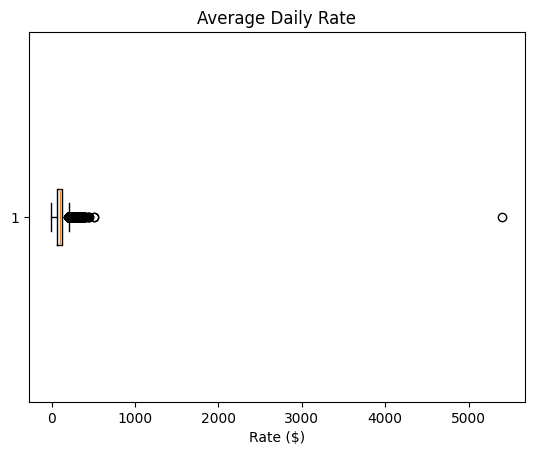

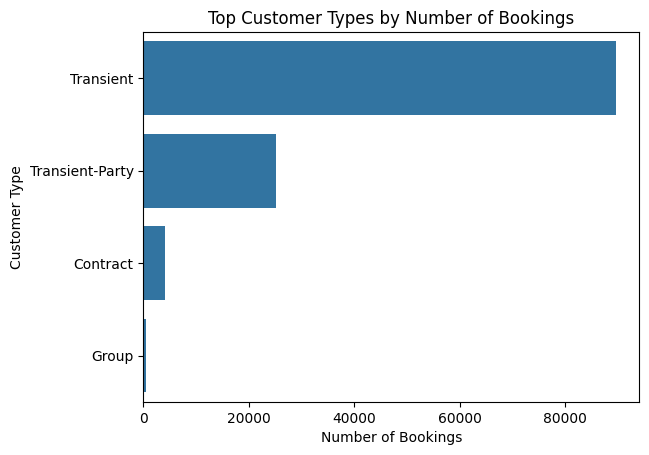

,proportion
is_canceled,
0,62.958372
1,37.041628


In [28]:
# Box Plot: Average Daily Rate
plt.boxplot(df['adr'], orientation='horizontal')
plt.title("Average Daily Rate")
plt.xlabel("Rate ($)")
plt.show()

# Bar plot of top customer types by number of bookings
top_customers = df['customer_type'].value_counts()

sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top Customer Types by Number of Bookings")
plt.xlabel("Number of Bookings")
plt.ylabel("Customer Type")
plt.show()

# Information about cancellations
df.is_canceled.value_counts(normalize=True) * 100

### In Your Response:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?

### ✍️ Your Response: 🔧
- Exploring the average daily rate variable led me to see some rather shocking outliers. While most of the Inter quartile range is between 100-300/night, the plot is barely usable because of the messy outliers.  
- The second was customer type. It was fascinating to find that transient and transient-parties made up the most number of bookings. Meaning that these are just the average Joes that are using a hotel.
- The final variable I explored was the `is_canceled` where 37% of all bookings got cancelled! I figured it would be a lot, but that is a good chunk of revenue.


## 5. Bivariate Analysis

### Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

### Do the following:
- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

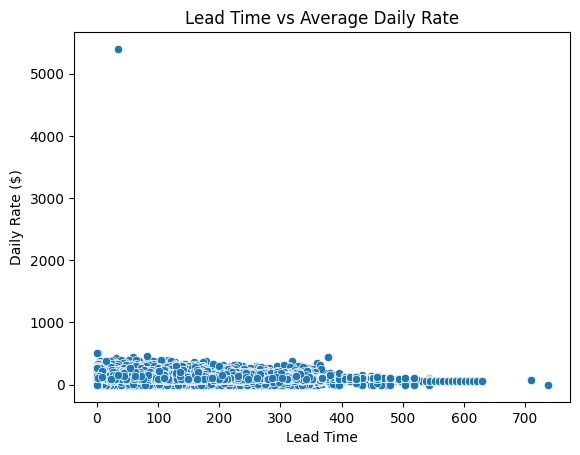

<Axes: xlabel='customer_type'>

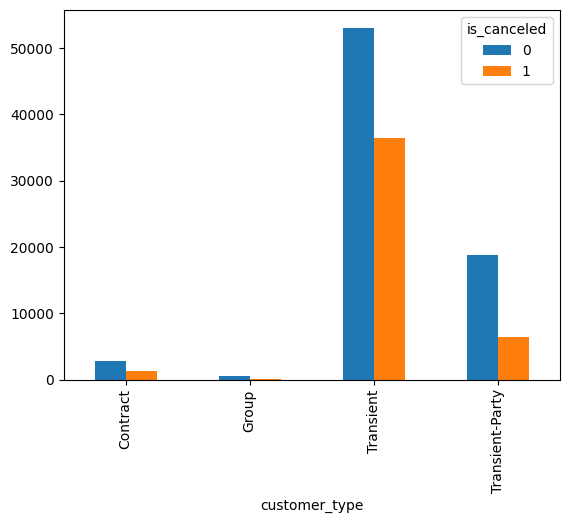

In [78]:
# Scatterplot: Lead Time vs Average Daily Rate
sns.scatterplot(x='lead_time', y='adr', data=df)
plt.title("Lead Time vs Average Daily Rate")
plt.xlabel("Lead Time")
plt.ylabel("Daily Rate ($)")
plt.show()

# Cancellations by customer types
top_customers = df.groupby(by=['customer_type','is_canceled']).size().reset_index()
top_customers.rename(columns={0:"count"}, inplace=True)
top_customers.set_index(["customer_type","is_canceled"])['count'].unstack().plot.bar()

### In Your Response:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?

### ✍️ Your Response: 🔧
- The first relationship was looking at the lead time with the Daily Rate. This relationship seemed to not matter. A longer or shorter lead time does not seem to make a difference in the daily rate.
- The other relationship was looking at the customer type and whether or not they cancelled. The good news is that no group had more cancellations than non-cancellations. Most of the grouops contained a even balance that was consistent with the average (about 37%). But, Transient-Party and Group were far less likely to cancel over Transient and Contracts.


## 6. Problem Complexity and Analytics Framing

### Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In Your Response:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



### ✍️ Your Response: 🔧
1. There is a strong relationship between high lead times and the cancellation rate.
2. This problem represents a variable problem where we need to undertand what predictors there are for guests who cancel their hotel rooms.
3. Descriptive analytics, predictive, and diagnostic would help explain/solve this analysis. We first want to describe the relationship with a correlation matrix. We then would want to be able to predict a cancellation rate based on the rest of the data like high lead times. Then we can help diagnose why high lead times lead to high cancellation rates.



## 7. Final Takeaways and Recommendations

### Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In Your Response:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. Transient Parties who book a hotel are far less likely to cancel compared to other customer types. The lead times did not contain a direct correlation to how much the daily rate was for the booked hotel.

2. For the Marketing manager, they can learn to spend more money on transient parties as they are goign to cancel less and therefore make more money for the company. The Director can use this to help understand why people are cancelling and possibly re-look at customer profiles.

3. The Director should focus efforts in overbooking hotel rooms that are booked with transient and contract customers, or make up for them by booking more with transient-parties and Groups.

4. This relates a lot to my customized learning outcome. I've wanted to be able to take a dataset, spot errors in the data (which we've now done quite a bit) and visualize that data in a clean and easy way. I feel a lot better about using Python to analyze data using different types of charts then I did at the beginning of the semester.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [ ]:
!jupyter nbconvert --to html "assignment_05_eda.ipynb"